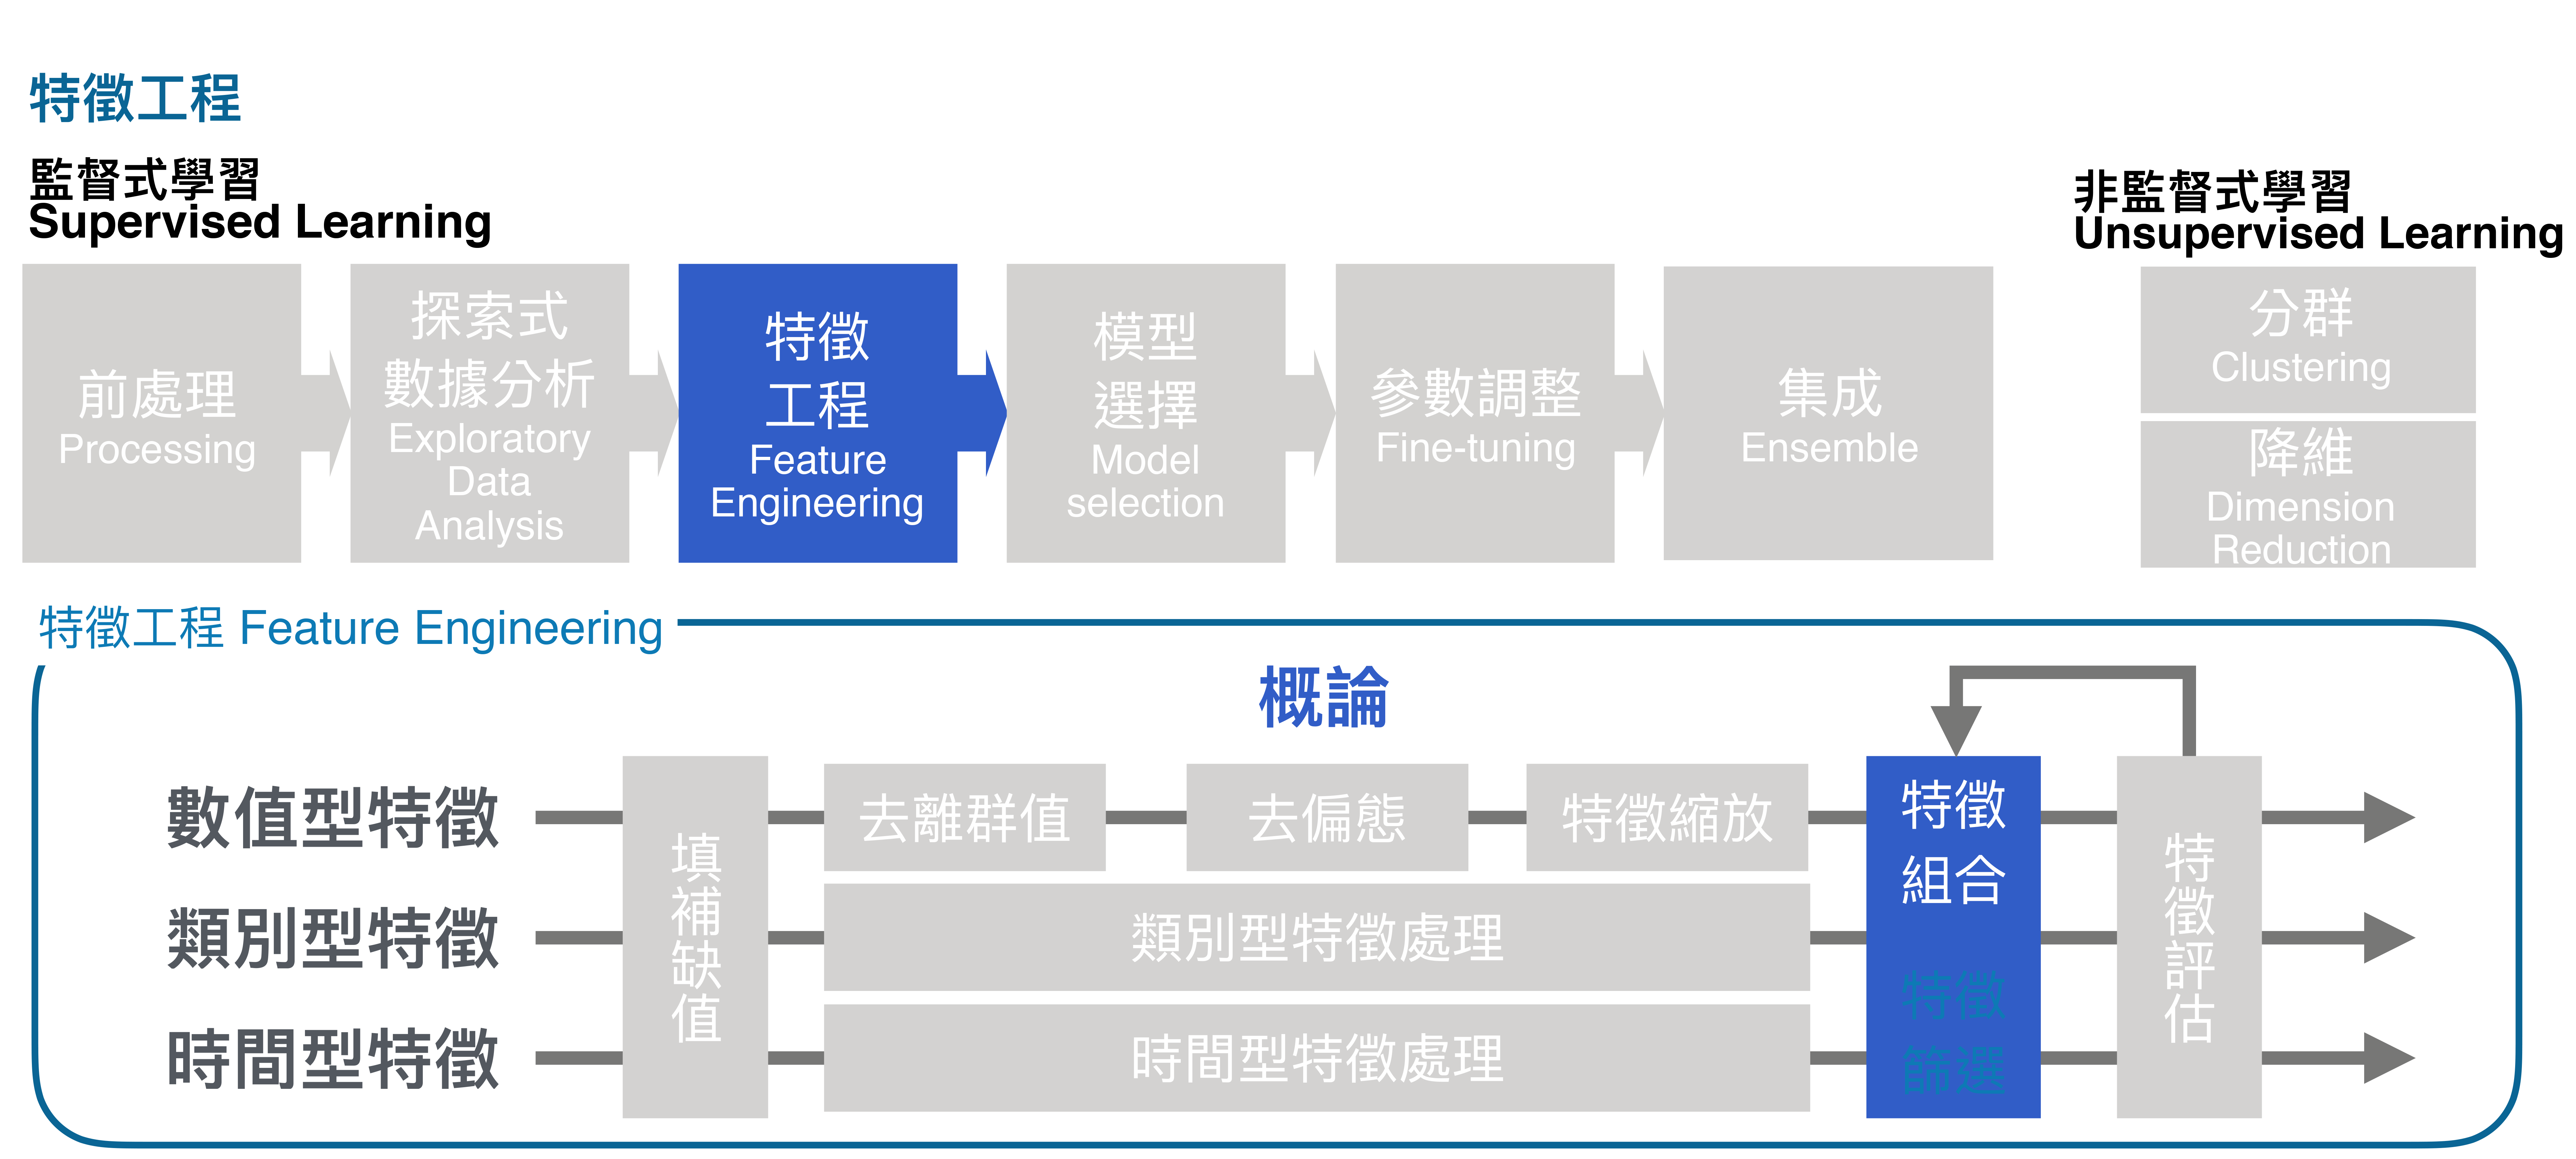

# 資料預處理

資料預處理是資料分析和機器學習的重要步驟。其目的是將原始資料轉換為適合模型分析和學習的格式。資料預處理通常需要做以下幾件事情：

1. **資料清理**

   資料清理是指去除資料中的錯誤、不一致和缺失值。常見的資料清理方法包括：

   - 檢查資料的格式和類型
   - 處理異常值
   - 處理缺失值
   - 統一資料的格式和類型

2. **資料整合**

   資料整合是指將來自不同來源的資料合併在一起。常見的資料整合方法包括：

   - 匹配資料的欄位
   - 合併資料的表
   - 處理資料的衝突

3. **資料轉換**

   資料轉換是指將資料轉換為適合模型分析和學習的格式。常見的資料轉換方法包括：

   - 特徵縮放
   - 特徵編碼
   - 特徵選擇


## 檢查資料的格式和類型

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'a': [1, 2, 3], 'b': [4.5, np.nan, 8.9], 'c': ['Hello', 'world', 1]})

print(df.dtypes)
# df

a      int64
b    float64
c     object
dtype: object


In [11]:
df.info()
# df.describe()
# df[["c"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      int64  
 1   b       2 non-null      float64
 2   c       3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


## 異常值
1. 如何判定異常值
2. 如何處理異常值或者空值

### 方法1  標準差：
- 在統計學中，如果一個數據分佈近似正態分佈，那麼大約68%的數據值在平均值的一個標準差內，約95%在兩個標準差內，約99.7%在三個標準差內。

In [1]:
import pandas as pd

iris = pd.read_csv('dataset/iris.csv', index_col = 0)
features = iris.iloc[:,:-1]
# 計算每個特徵的平均值和標準差
means = features.mean()
stds = features.std()

# 判定異常值
for i in features.index:
    for col in features.columns:
        if abs(features.loc[i, col] - means[col]) > (3 * stds[col]):
            print(f'{col} 異常值：{iris.loc[i, col]}')
print(features)
for i in features.index:
    for col in features.columns:
        features = features[(features.loc[:, col] - means[col]).abs() < (3 * stds[col])]

print(features)


SepalWidthCm 異常值：4.4
SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64 SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64


## 盒鬚圖
![](https://media.finebi.com/strapi/_06b36597d6.png)
- [盒鬚圖怎麼看](https://intl.finebi.com/zh-TW/blog/boxplot)

In [41]:
import pandas as pd

iris = pd.read_csv('dataset/iris.csv')
iris = iris.iloc[:,:-1]

# 計算每個特徵的四分位數
q1 = iris.quantile(0.25)
q3 = iris.quantile(0.75)

# 判定異常值
for i in range(iris.shape[0]):
    for col in iris.columns:
        if iris.loc[i, col] < q1[col] - 1.5 * (q3[col] - q1[col]) or iris.loc[i, col] > q3[col] + 1.5 * (q3[col] - q1[col]):
            print(f'index:{i}, column:{col} 異常值：{iris.loc[i, col]}')


index:15, column:SepalWidthCm 異常值：4.4
index:32, column:SepalWidthCm 異常值：4.1
index:33, column:SepalWidthCm 異常值：4.2
index:60, column:SepalWidthCm 異常值：2.0


## DBSCAN 判定異常值的方法

- DBSCAN 判定異常值的方法是基於密度聚類來判定異常值。DBSCAN 會根據資料點之間的距離將資料點聚類在一起。密度較低的區域通常被認為是異常值。



In [53]:
from sklearn.cluster import DBSCAN

iris = pd.read_csv('dataset/iris.csv')
iris = iris.iloc[:,:-1]
# 訓練 DBSCAN 模型
dbscan = DBSCAN(eps=2, min_samples=3)
labels = dbscan.fit_predict(iris)

# 判定異常值
for i in range(iris.shape[0]):
    if labels[i] == -1:
        print(f'index:{i},異常值：{iris.loc[i, :]}')


index:57,異常值：Id               58.0
SepalLengthCm     4.9
SepalWidthCm      2.4
PetalLengthCm     3.3
PetalWidthCm      1.0
Name: 57, dtype: float64
index:98,異常值：Id               99.0
SepalLengthCm     5.1
SepalWidthCm      2.5
PetalLengthCm     3.0
PetalWidthCm      1.1
Name: 98, dtype: float64
index:99,異常值：Id               100.0
SepalLengthCm      5.7
SepalWidthCm       2.8
PetalLengthCm      4.1
PetalWidthCm       1.3
Name: 99, dtype: float64
index:106,異常值：Id               107.0
SepalLengthCm      4.9
SepalWidthCm       2.5
PetalLengthCm      4.5
PetalWidthCm       1.7
Name: 106, dtype: float64
index:117,異常值：Id               118.0
SepalLengthCm      7.7
SepalWidthCm       3.8
PetalLengthCm      6.7
PetalWidthCm       2.2
Name: 117, dtype: float64
index:118,異常值：Id               119.0
SepalLengthCm      7.7
SepalWidthCm       2.6
PetalLengthCm      6.9
PetalWidthCm       2.3
Name: 118, dtype: float64
index:122,異常值：Id               123.0
SepalLengthCm      7.7
SepalWidthCm       2.8
Pet

## 異常值處理方法

**刪除異常值**

刪除異常值是最簡單的處理異常值的方法。但是，這種方法可能會導致資料量的減少，從而影響資料分析結果的準確性。

**將異常值替換為平均值或中位數**

這種方法是使用統計方法來估算異常值。平均值是將所有非異常值的平均值用於替換異常值。中位數是將所有非異常值的眾數用於替換異常值。

## 缺失值的處理方法

**刪除包含缺失值的樣本**

刪除包含缺失值的樣本是最簡單的處理缺失值的方法。但是，這種方法可能會導致資料量的減少，從而影響資料分析結果的準確性。

**使用平均值、中位數或眾數填充缺失值**

這種方法是使用統計方法來估算缺失值。平均值是使用所有非缺失值的平均值來填充缺失值。中位數是使用所有非缺失值的眾數來填充缺失值。眾數是使用所有非缺失值出現最多的值來填充缺失值。

**使用插補方法填充缺失值**

插補方法是使用相鄰資料點的值來估算缺失值。常用的插補方法包括線性插補、拋物線插補和三次曲線插補。
通常在時間序列的資料中會使用到

**使用機器學習方法填充缺失值**

機器學習方法可以自動估算缺失值。常用的機器學習方法包括 KNN 等等模型。


## 插值法

- [官方連結](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

```
DataFrame.interpolate(method='linear', axis=0, limit=None, fill_value=None, inplace=False, **kwargs)
```
- method：插補方法。默認為 linear，即線性插補。其他可選值包括：
  - nearest：最近鄰居插補
  - zero：用 0 填充缺失值
  - slinear：線性插補，但只使用相鄰的非缺失值
  - quadratic：拋物線插補
  - cubic：三次曲線插補
  - polynomial：多項式插補
  - spline：樣條插補
  - piecewise_polynomial：分段多項式插補
  - from_derivatives：從導數插補
  - pchip：PCHIP 插補
  - akima：Akima 插補


In [2]:
import numpy as np

# 讀取資料
data = pd.read_csv('dataset/time_series_data.csv')

data["Date"] = pd.to_datetime(data["Date"])
print(data)
data = data.set_index("Date")
# 填充缺失值
inter_data = data.interpolate()
print(inter_data)

        Date   Open  High  Low  Close  Volume
0 2023-01-01  100.0   105   95    100   10000
1 2023-01-02  101.0   106   96    101   10100
2 2023-01-03  102.0   107   97    102   10200
3 2023-01-04  103.0   108   98    103   10300
4 2023-01-05  104.0   109   99    104   10400
5 2023-01-06    NaN   110  100    105   10500
6 2023-01-07  106.0   111  101    106   10600
7 2023-01-08  107.0   112  102    107   10700
8 2023-01-09    NaN   113  103    108   10800
9 2023-01-10  109.0   114  104    109   10900
             Open  High  Low  Close  Volume
Date                                       
2023-01-01  100.0   105   95    100   10000
2023-01-02  101.0   106   96    101   10100
2023-01-03  102.0   107   97    102   10200
2023-01-04  103.0   108   98    103   10300
2023-01-05  104.0   109   99    104   10400
2023-01-06  105.0   110  100    105   10500
2023-01-07  106.0   111  101    106   10600
2023-01-08  107.0   112  102    107   10700
2023-01-09  108.0   113  103    108   10800
2023-01-10

## 平均值的優缺點

### 優點：

- 計算簡單
- 可以保留數據的原始信息

### 缺點：

- 容易受到異常值的影響
- 不適用於非正態分布的數據

## 眾數的優缺點

### 優點：

- 不受異常值的影響
- 適用於非正態分布的數據

### 缺點：

- 可能會降低數據的準確性
- 不適用於數值型特徵

### 重點整理
- 對於正態分布的數據，可以使用平均值填充缺失值。
- 對於非正態分布的數據，可以使用眾數填充缺失值。
- 對於數值型特徵，可以使用平均值填充缺失值。
- 對於類別型特徵，可以使用眾數填充缺失值。

此外，還可以使用一些更複雜的填充方法，例如插補法和機器學習。這些方法可以更好地保留數據的原始信息，但計算量也更大。

在實際應用中，可以根據具體情況選擇合適的缺失值填充方式。


In [23]:
# 載入數據
import pandas as pd

train = pd.read_csv('dataset/titanic/train.csv')
test = pd.read_csv('dataset/titanic/test.csv')

# 合併訓練集和測試集
data = pd.concat([train, test], ignore_index=True)
# 處理缺失值
# print(data.head())
# data.info()
# 平均值
data['Age_mean'] = data['Age'].fillna(data['Age'].mean())
data['Fare_mean'] = data['Fare'].fillna(data['Fare'].mean())

# 中位數
data['Age_median'] = data['Age'].fillna(data['Age'].median())
data['Fare_median'] = data['Fare'].fillna(data['Fare'].median())

# 眾數
data['Embarked_mode'] = data['Embarked'].fillna(data['Embarked'].mode())

# 處理類別型特徵
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


data.head()
# 分割訓練集和測試集
X_train = data[data['Survived'].notnull()].drop('Survived', axis=1)
y_train = data[data['Survived'].notnull()]['Survived']
X_test = data[data['Survived'].isnull()].drop('Survived', axis=1)



# 建立 DT 分類器
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, model.predict(X_train))

print('訓練集準確率：', accuracy)

accuracy = accuracy_score(y_test, y_pred)

print('測試集準確率：', accuracy)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Fare_mean,Age_median,Fare_median,Embarked_mode
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,22.0,7.2500,22.0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,38.0,71.2833,38.0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,26.0,7.9250,26.0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,35.0,53.1000,35.0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,35.0,8.0500,35.0,8.0500,S


## 資料的格式統一

### 標準化的適用情境

標準化適用於以下情境：

1. 資料服從正態分布
2. 需要計算資料之間的距離

### 歸一化的適用情境

歸一化適用於以下情境：

1. 資料不服從正態分布
2. 資料的範圍不確定

In [68]:
import numpy as np
from sklearn.datasets import load_iris

# 讀取資料
iris = load_iris()
data = iris.data

# 輸出結果
print(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [69]:
from sklearn.preprocessing import MinMaxScaler

# 歸一化資料
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)

# 輸出結果
print(data_minmax)


[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [70]:
from sklearn.preprocessing import StandardScaler

# 標準化資料
scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(data)

# 輸出結果
print(data_standard)


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## 特徵工程技術

- 數值特徵處理
- 類別特徵處理
- 時間序列特徵處理
- 文本特徵處理

### 數值特徵處理

標準化：將數值特徵轉換為均值為 0、標準差為 1 的標準正態分布。

歸一化：將數值特徵轉換為 0 到 1 之間的範圍。

離散化：將數值特徵轉換為離散值。
- 離散化：假設某個數據集中的收入特徵的範圍為 10 萬到 100 萬美元。可以使用離散化將收入特徵轉換為離散值
- [cut 官方文件](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

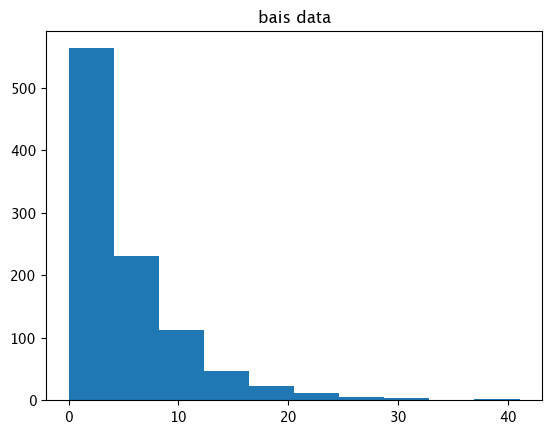

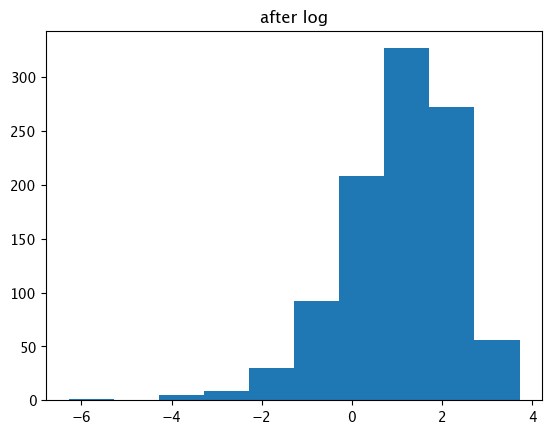

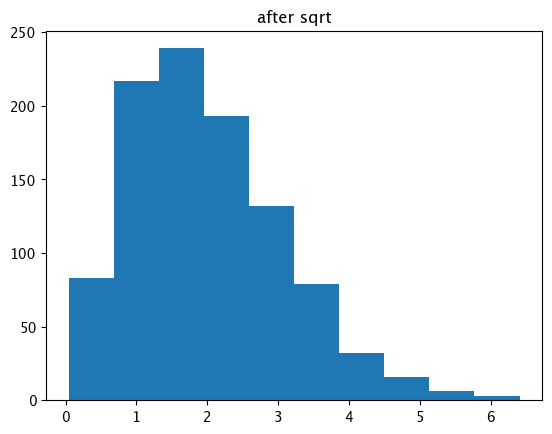

In [8]:
import numpy as np

# 生成正偏態資料
data_bais = np.random.gamma(1, 5, 1000)

import matplotlib.pyplot as plt
plt.hist(data_bais)
plt.title("bais data")
plt.show()

# 使用 log 去除偏態
data_log = np.log(data_bais)
plt.title("after log")
plt.hist(data_log)
plt.show()

# 使用開根號去除偏態
data_sqrt = np.sqrt(data_bais)
plt.title("after sqrt")
plt.hist(data_sqrt)
plt.show()

- [延伸閱讀 box-col](https://blog.csdn.net/qq_42774234/article/details/130059235?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-130059235-blog-115212088.235^v43^pc_blog_bottom_relevance_base4&spm=1001.2101.3001.4242.2&utm_relevant_index=4)

In [80]:
import pandas as pd

# 讀取數據
df = pd.read_csv("dataset/titanic/train.csv")


# 離散化
bins = [0, 18, 30, 45, 60, 100]
labels = ["0-18", "18-30", "30-45", "45-60", "60-100"]
df["AgeRange"] = df[["Age"]].apply(pd.cut, bins=bins, labels=labels)

# 查看結果
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeRange  
0      0         A/5 21171   7.2500   NaN        S    18-30  
1      0          PC 17599  71.2833   C85        C    30-45  
2      0  STON/O2. 3101282   7.9250   NaN        S    18-30  
3      0            113803  53.1000  C123        S    30-45  
4      0  

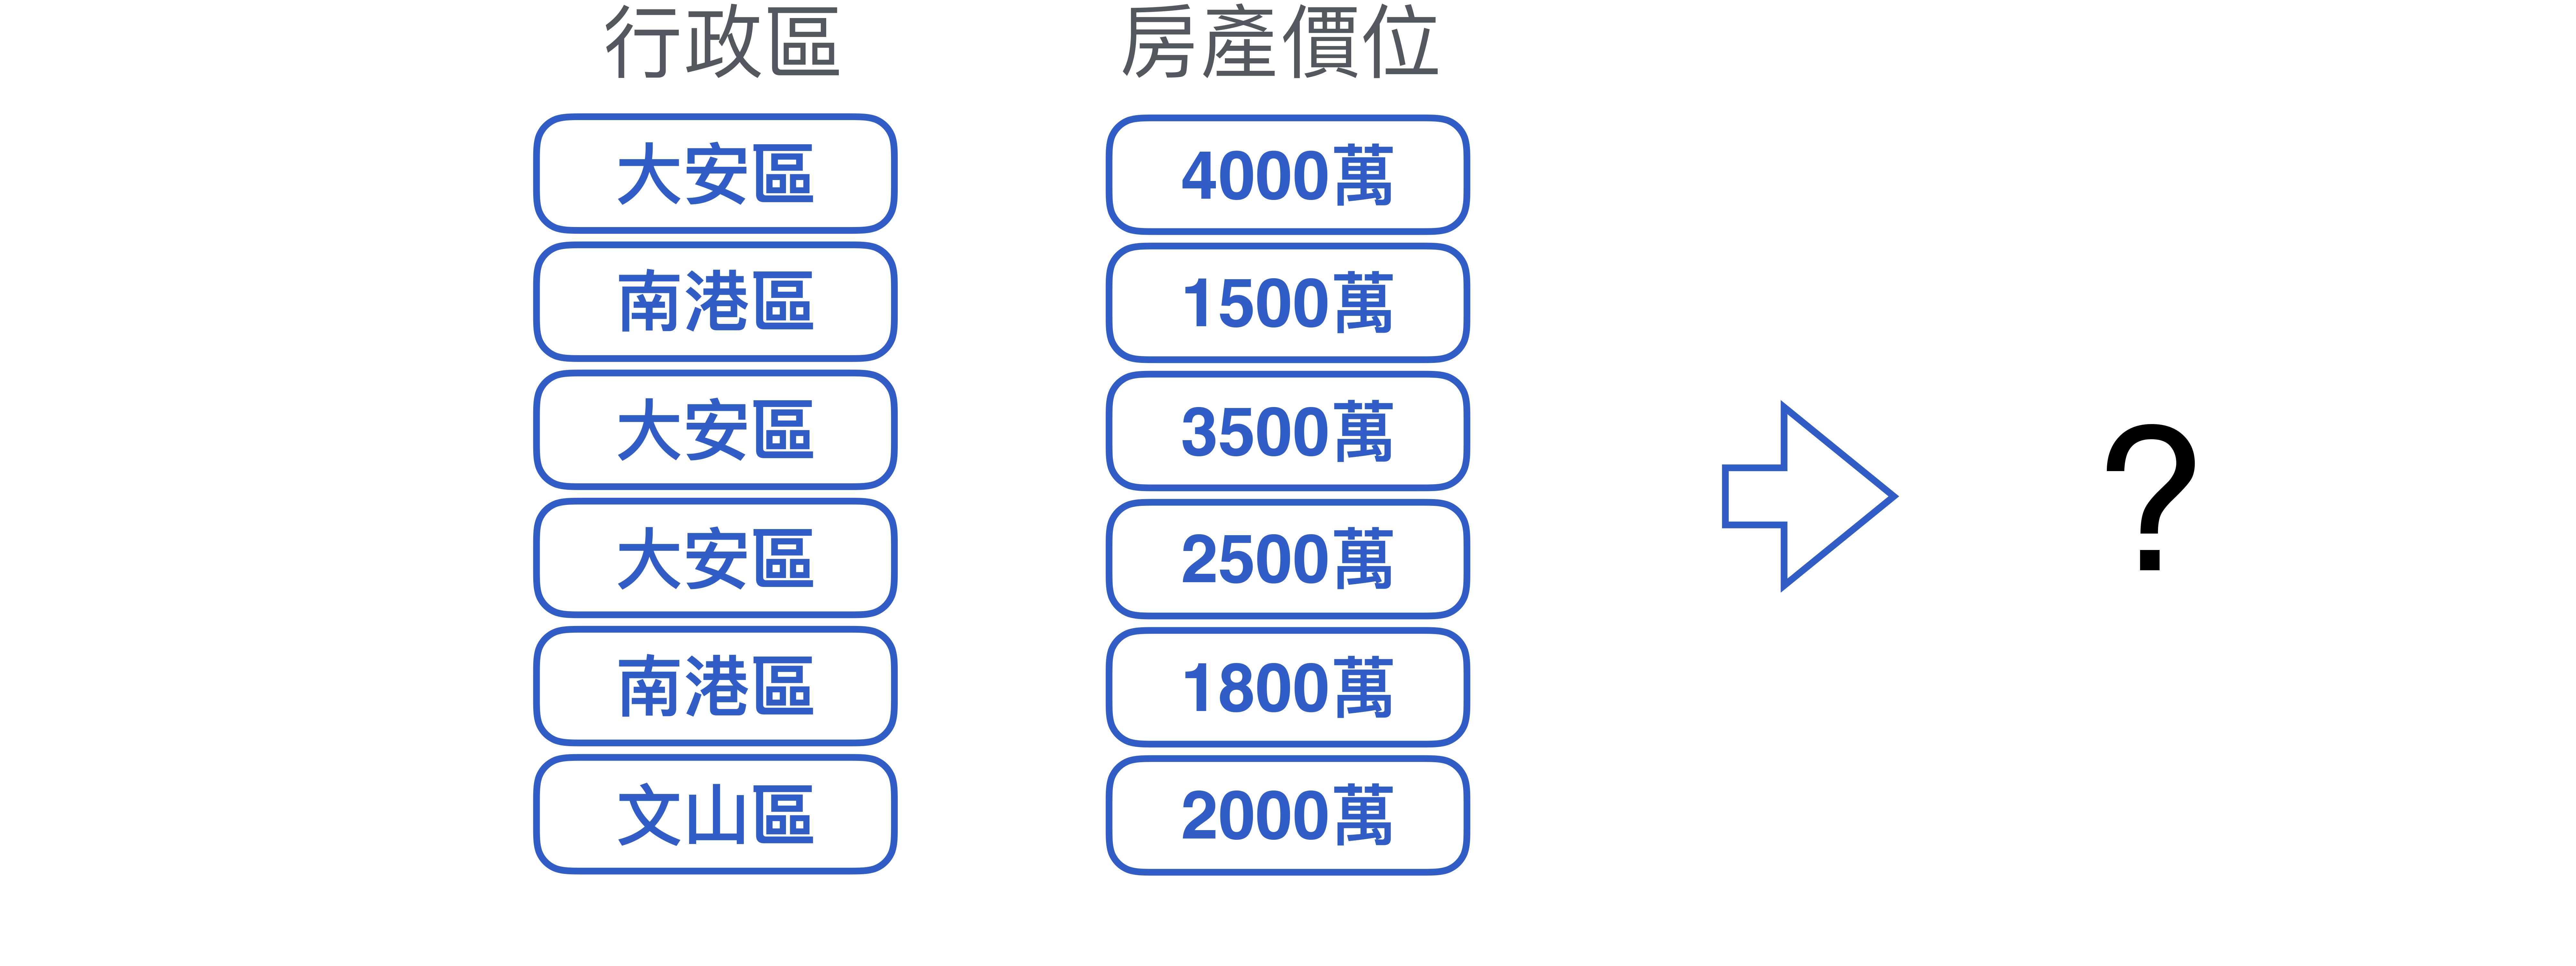

### 優缺點
- [link](https://zhuanlan.zhihu.com/p/26308272)
#### 優點

1. 簡單易懂，易於實現
2. 可以有效保留類別型特徵的原始信息
3. 可以提高模型的準確率
#### 缺點

1. 可能會導致資料過擬合
2. 可能會對異常值敏感

### 類別特徵處理

類別特徵是不能用數值表示的特徵，例如性別、顏色、國家等。類別特徵處理的常用技術包括：

標籤編碼：將類別特徵轉換為數值。

讀熱編碼：將類別特徵轉換為二進制向量。

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 讀取數據
df = pd.read_csv("dataset/titanic/train.csv")

# 選擇類別特徵
categorical_features = "Embarked"

# 標籤編碼
le = LabelEncoder()
df[f"{categorical_features}Label"] = le.fit_transform(df[categorical_features])

# 查看結果
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  EmbarkedLabel  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None


In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 讀取數據
df = pd.read_csv("dataset/titanic/train.csv")

# 選擇類別特徵
categorical_features = ["Embarked"]

# 讀熱編碼
ohe = OneHotEncoder()
df_encoded = ohe.fit_transform(df[categorical_features])

# 查看結果
print(ohe.get_feature_names_out())
print(df_encoded.toarray())

['Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan']
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


### 時間序列特徵處理

時間序列特徵是按時間順序排列的特徵，例如股票價格、氣溫等。時間序列特徵處理的常用技術包括：

平滑：使用滑動平均等方法平滑時間序列特徵。
- 假設某個數據集中的股票價格特徵存在波動。可以使用滑動平均等方法平滑股票價格特徵，以消除波動。

去趨勢：使用線性回歸等方法去除時間序列特徵的趨勢。
- 假設某個數據集中的氣溫特徵呈現上升趨勢。可以使用線性回歸等方法去除氣溫特徵的趨勢。

季節性分解：使用季節性分解等方法分解時間序列特徵的季節性。
- 假設某個數據集中的銷售額特徵存在季節性。可以使用季節性分解等方法分解銷售額特徵的季節性


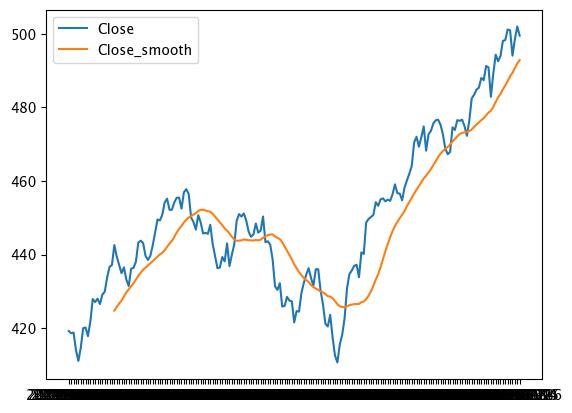

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取數據
df = pd.read_csv("dataset/SPY.csv", index_col="Date")

# 平滑
df["Close_smooth"] = df["Close"].rolling(window=20).mean()

# 可視化
plt.plot(df["Close"], label="Close")
plt.plot(df["Close_smooth"], label="Close_smooth")
plt.legend()
plt.show()


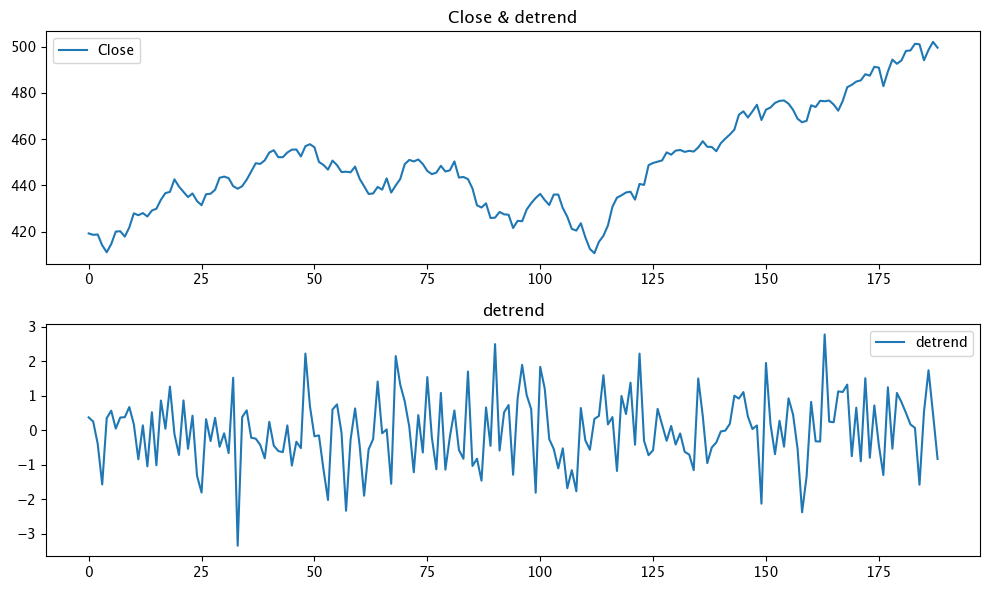

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.253e+07
Date:                Sat, 06 Apr 2024   Prob (F-statistic):                        0.00
Time:                        20:48:18   Log-Likelihood:                         -268.36
No. Observations:                 189   AIC:                                      542.7
Df Residuals:                     186   BIC:                                      552.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 

# 讀取數據
df = pd.read_csv("dataset/SPY.csv")

y = df[["Open", "High", "Low"]]
df = df.drop(["Date"], axis = 1)
# 去趨勢
model = sm.OLS(df[["Close"]], y) # 用線性的方式去除掉趨勢
results = model.fit()
df["Close_detrend"] = results.resid
# 可視化

# 創建子图
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))

ax1.plot(df["Close"], label="Close")
ax1.set_title("Close & detrend")
ax1.legend()

ax2.plot(df["Close_detrend"], label="detrend")
ax2.set_title("detrend")
ax2.legend()

fig.tight_layout()
plt.show()
print(results.summary())

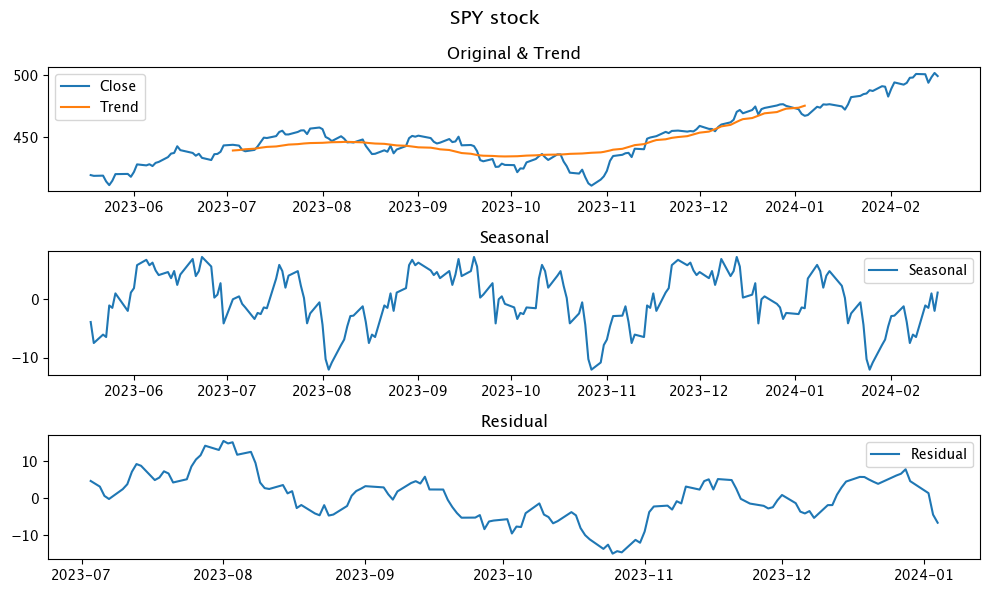

In [34]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# 讀取數據
df = pd.read_csv("dataset/SPY.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
# df.index = df.index.to_period("D")
# 季節性分解
decomposition = seasonal_decompose(df["Close"], period=60) # 以季節性的方法去除掉趨勢
# # 可視化
# 創建子图
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 6))

ax1.plot(df["Close"], label="Close")
ax1.plot(decomposition.trend, label="Trend")
ax1.set_title("Original & Trend")
ax1.legend()

ax2.plot(decomposition.seasonal, label="Seasonal")
ax2.set_title("Seasonal")
ax2.legend()

ax3.plot(decomposition.resid, label="Residual")
ax3.set_title("Residual")
ax3.legend()

fig.suptitle("SPY stock", fontsize=14)
plt.tight_layout()

plt.show()

### 使用技巧

- 線性回歸去除趨勢是基於假設趨勢是線性的。如果趨勢是非線性的，那麼線性回歸可能會得到不準確的結果。
- 季節分解方法是基於假設數據具有季節性。如果數據沒有季節性，那麼季節分解方法可能會得到不準確的結果。

具體來說

- SPY 股票價格的趨勢可能是非線性的。因此，使用線性回歸去除趨勢可能會得到不準確的結果。
- SPY 股票價格可能具有季節性。因此，使用季節分解方法得到 resid 可能更準確。

- [decompose 教學](https://blog.csdn.net/weixin_43290383/article/details/113175319)

### 文本特徵處理

文本特徵是文本形式的特徵，例如新聞文章、產品評論等。文本特徵處理的常用技術包括：

分詞：將文本切分為單詞或詞組。

去停用詞：去除常見的無意義詞語(stop words)。
- 假設某個數據集中的產品評論特徵為“這是一款非常好的產品”。可以使用去停用詞去除“這”、“是”、“一”、“個”、“非常”等停用詞

文本向量化：將文本轉換為數值向量。
- tf-idf

In [41]:
import jieba

# 示例數據
text = "中國經濟發展迅速，GDP上升10%"

# 分詞
words = jieba.cut(text)

# 打印分詞結果
for word in words:
    print(word)

中國
經濟
發展
迅速
，
GDP
上升
10%


In [26]:
# 目前的 jieba 裡面沒有看到相關的移除 stop word 相關的功能

- [jieba 簡易教學](https://medium.com/seaniap/python-%E4%B8%AD%E6%96%87%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E8%99%95%E7%90%86jieba%E6%96%B7%E8%A9%9E-9ab44a1b6a9d)

In [38]:
import nltk

# 示例數據
text = "The economy of China is developing rapidly."

# 分詞
words = nltk.word_tokenize(text)

# 打印分詞結果
for word in words:
    print(word)


我的青春一去不回頭


In [28]:
import nltk

# 示例數據
text = "The economy of China is developing rapidly."

# 去除停用詞
stop_words = nltk.corpus.stopwords.words("english")
words = [word for word in nltk.word_tokenize(text) if word not in stop_words]

# 打印分詞結果
for word in words:
    print(word)


The
economy
China
developing
rapidly
.


- [nltk 教學](https://medium.com/pyladies-taiwan/nltk-%E5%88%9D%E5%AD%B8%E6%8C%87%E5%8D%97-%E4%B8%80-%E7%B0%A1%E5%96%AE%E6%98%93%E4%B8%8A%E6%89%8B%E7%9A%84%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E5%B7%A5%E5%85%B7%E7%AE%B1-%E6%8E%A2%E7%B4%A2%E7%AF%87-2010fd7c7540)

### 文本向量化
- 文本向量化是將文本轉換為數值向量的過程。它可以幫助我們將文本數據用於機器學習模型。

- 文本向量化的常用方法包括：

1. 詞袋模型 (Bag of Words)
    - 詞袋模型 (BOW) 是最簡單的文本向量化方法之一。它將文本視為一個單詞的集合，並統計每個單詞出現的次數。
    - BOW 的優點是簡單易懂，缺點是忽略了詞序和詞性等信息。

2. TF-IDF
    - TF-IDF 是 BOW 的一種改進方法。它考慮了詞頻 (TF) 和逆向文檔頻率 (IDF) 兩方面的信息。
    - TF 是指一個詞在一個文檔中出現的次數。IDF 是指一個詞在所有文檔中出現的頻率的倒數。
    - TF-IDF 的優點是可以更好地反映詞語的重要程度，缺點是計算量較大。

3. Word2Vec
    - Word2Vec 是一種基於神經網絡的文本向量化方法。它可以將詞語轉換為低維的稠密向量。
    - Word2Vec 的優點是可以保留詞語的語義信息，缺點是訓練過程比較複雜。

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names_out()
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [56]:
import jieba

data = ["中國經濟發展迅速", "美國總統拜登訪問中國", "蘋果公司迅速推出新產品"]

data_new=[]
for text in data:
    data_new.append(' '.join(list(jieba.cut(text)))) # 預設適用 "," "." " " 半型的符號去做切割
print(data_new)

vectorizer=CountVectorizer(stop_words=['了','的','呢'])
cvt_data_new=vectorizer.fit_transform(data_new)
vectorizer.get_feature_names_out()
cvt_data_new.toarray()

['中國:經濟:發展:迅速', '美國:總統:拜登:訪問:中國', '蘋果:公司:迅速:推出:新產品']


array([[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 測試句子
sentences = ["中國經濟發展非常迅速", "美國總統拜登訪問中國", "蘋果公司迅速推出新產品"]

data_new=[]
for text in sentences:
    data_new.append(' '.join(list(jieba.cut(text)))) # 預設適用 "," "." " " 半型的符號去做切割

# 文本向量化
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_new)

# 查看文本向量化結果
print(X.toarray())
vectorizer.get_feature_names_out()

[[0.33517574 0.         0.47107781 0.47107781 0.         0.
  0.         0.47107781 0.47107781]
 [0.33517574 0.47107781 0.         0.         0.47107781 0.47107781
  0.47107781 0.         0.        ]]


array(['中國', '拜登', '發展', '經濟', '總統', '美國', '訪問', '迅速', '非常'], dtype=object)

In [78]:
from gensim.models import Word2Vec

# 示例數據
sentences = ["中國經濟發展迅速", "美國總統拜登訪問日本", "蘋果公司推出新產品"]

data_new=[]
for text in sentences:
    data_new.append(list(jieba.cut(text))) # 預設適用 "," "." " " 半型的符號去做切割


## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=data_new, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)


# 查看模型結果
print(word2vec_model.wv["中國"])

[-1.9442164e-03 -5.2675214e-03  9.4471136e-03 -9.2987325e-03
  4.5039477e-03  5.4041781e-03 -1.4092624e-03  9.0070926e-03
  9.8853596e-03 -5.4750429e-03 -6.0210000e-03 -6.7469729e-03
 -7.8948820e-03 -3.0479168e-03 -5.5940272e-03 -8.3446801e-03
  7.8290224e-04  2.9946566e-03  6.4147436e-03 -2.6289499e-03
 -4.4534765e-03  1.2495709e-03  3.9146186e-04  8.1169987e-03
  1.8280029e-04  7.2315861e-03 -8.2645155e-03  8.4335366e-03
 -1.8889094e-03  8.7011540e-03 -7.6168370e-03  1.7963862e-03
  1.0564864e-03  4.6005251e-05 -5.1032533e-03 -9.2476979e-03
 -7.2642174e-03 -7.9511739e-03  1.9137275e-03  4.7846674e-04
 -1.8131376e-03  7.1201660e-03 -2.4756920e-03 -1.3473093e-03
 -8.9005642e-03 -9.9254129e-03  8.9493981e-03 -5.7539381e-03
 -6.3729975e-03  5.1994072e-03  6.6699935e-03 -6.8316413e-03
  9.5975993e-04 -6.0084737e-03  1.6473436e-03 -4.2892788e-03
 -3.4407973e-03  2.1856665e-03  8.6615775e-03  6.7281104e-03
 -9.6770572e-03 -5.6221043e-03  7.8803329e-03  1.9893574e-03
 -4.2560520e-03  5.98812

## BOW

BOW 是一種簡單的文本向量化方法，但它忽略了詞序和詞性等信息。 BOW 的計算量較小，但它可能無法準確反映文本的含義。

- **優點：** 計算量小，適用於文本分類、信息檢索等任務。
- **注意事項：** 在使用 BOW 之前，需要對文本進行分詞和去停用詞處理。

## TF-IDF

TF-IDF 是一種改進的文本向量化方法，可以更好地反映詞語的重要程度。 TF-IDF 的計算量較大，但它可能無法捕捉到詞語之間的語義關係。

- **優點：** 能更好地反映詞語重要性，適用於文本分類、信息檢索、情感分析等任務。
- **注意事項：** 在使用 TF-IDF 之前，需要對文本進行分詞和去停用詞處理。 IDF 值可能會受到文檔集的規模的影響。

## Word2Vec

Word2Vec 是一種基於神經網絡的文本向量化方法，可以保留詞語的語義信息。 Word2Vec 的訓練過程比較複雜，需要大量的訓練數據。

- **優點：** 保留詞語的語義信息，適用於文本分類、信息檢索、機器翻譯等任務。
- **注意事項：** 訓練過程需要大量的計算資源，模型可能受到訓練數據的偏見的影響。

## 具體注意事項

- **BOW：** 在使用 BOW 之前，需要對文本進行分詞和去停用詞處理。適用於文本分類、信息檢索等任務。

- **TF-IDF：** 在使用 TF-IDF 之前，需要對文本進行分詞和去停用詞處理。適用於文本分類、信息檢索、情感分析等任務。IDF 值可能會受到文檔集的規模的影響。

- **Word2Vec：** 適用於文本分類、信息檢索、機器翻譯等任務。訓練過程需要大量的計算資源，模型可能受到訓練數據的偏見的影響。


[可參考範例](https://www.kaggle.com/code/bbqlp33/word2vec-gensim)

## 特徵選擇法 
- 相關係數過濾法

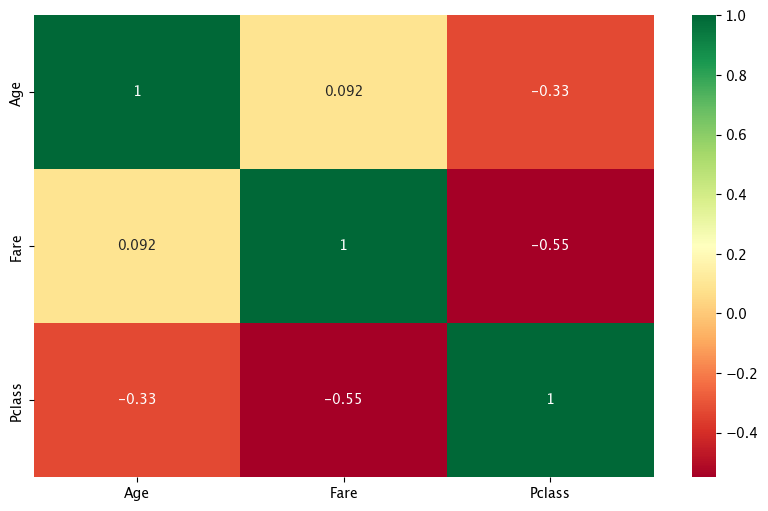

In [16]:
import pandas as pd
import seaborn as sns
# 讀取資料
data = pd.read_csv('dataset/titanic/train.csv')

# 處理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')

# 選取特徵
features = ['Age', 'Fare', 'Pclass']

# 計算相關係數
corr = data[features].corr()

# 繪製熱力圖
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

- 有沒有想到其他種用 model 的方式來過濾呢？